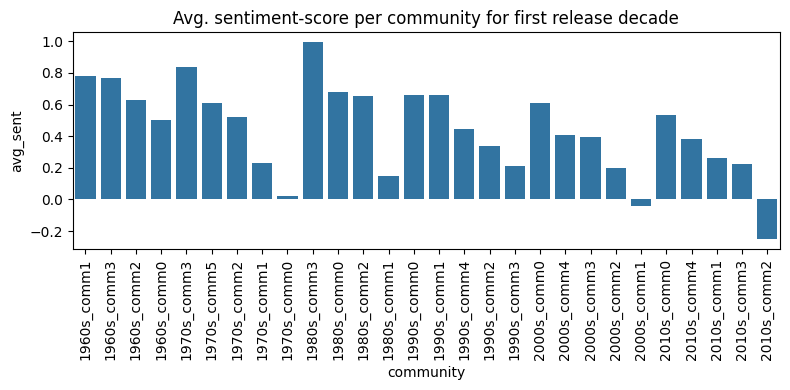

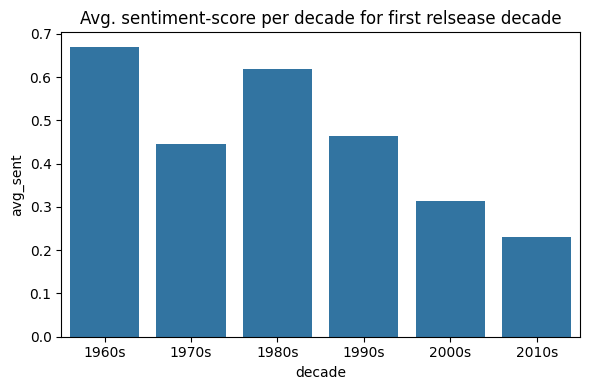

In [7]:
# ─── 1) Sentiment‐analyse med VADER ─────────────────────────────────────────
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

COMM_LYRICS_DIR = "community_lyrics_ovh"  # mappen med dine CSV’er
sia = SentimentIntensityAnalyzer()

rows = []
for fname in os.listdir(COMM_LYRICS_DIR):
    if not fname.endswith("_lyrics.csv"):
        continue
    label = fname.replace("_lyrics.csv","")
    df = pd.read_csv(os.path.join(COMM_LYRICS_DIR, fname))
    # compound‐score for hver sang
    scores = df["lyrics"].apply(lambda txt: sia.polarity_scores(txt)["compound"])
    rows.append({
        "community": label,
        "n_songs":   len(scores),
        "avg_sent":  scores.mean()
    })

sent_df = pd.DataFrame(rows)
sent_df.to_csv("community_sentiment.csv", index=False, encoding="utf-8")
# print(sent_df)

# ─ Plot communities inden for hvert årti ─
sent_df["decade"] = sent_df["community"].str[:4] + "s"
fig, ax = plt.subplots(figsize=(8,4))
# Sortér efter sentiment inden for hver decade
order = sent_df.sort_values(["decade","avg_sent"], ascending=[True,False])["community"]
import seaborn as sns
sns.barplot(x="community", y="avg_sent", data=sent_df, order=order, ax=ax)
plt.xticks(rotation=90)
plt.title("Avg. sentiment‐score per community for first release decade")
plt.tight_layout()
plt.show()

# ─ Aggregeret sentiment per årti ─
decade_df = sent_df.groupby("decade")["avg_sent"].mean().reset_index()
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="decade", y="avg_sent", data=decade_df, ax=ax)
plt.title("Avg. sentiment‐score per decade for first relsease decade")
plt.tight_layout()
plt.show()

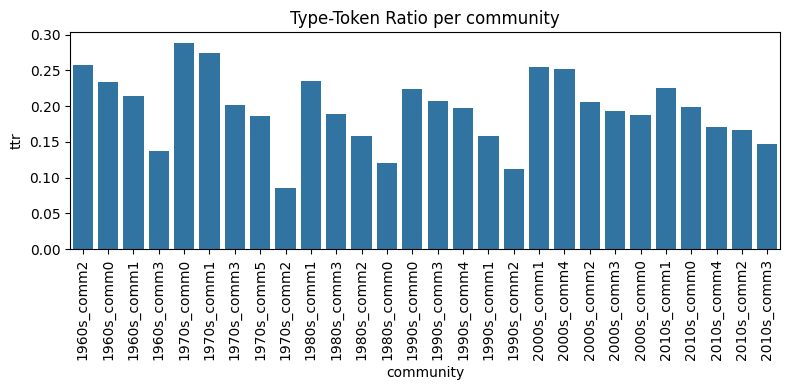

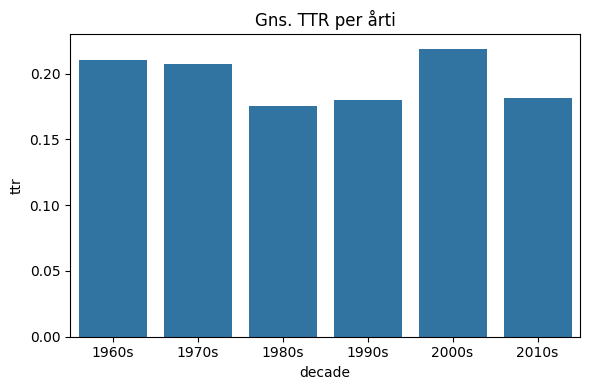

In [4]:
# ─── 2) Lexical diversity (Type‐Token Ratio) ────────────────────────────────
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

COMM_LYRICS_DIR = "community_lyrics_ovh"

rows = []
for fname in os.listdir(COMM_LYRICS_DIR):
    if not fname.endswith("_lyrics.csv"):
        continue
    label = fname.replace("_lyrics.csv","")
    df = pd.read_csv(os.path.join(COMM_LYRICS_DIR, fname))
    # slå alle tekster sammen, lav token‐liste
    all_text = " ".join(df["lyrics"].tolist()).lower()
    tokens = [w for w in re.findall(r"\b\w+\b", all_text) if len(w)>2]
    types  = set(tokens)
    ttr    = len(types) / len(tokens) if tokens else 0
    rows.append({"community": label, "ttr": ttr})

ttr_df = pd.DataFrame(rows)
ttr_df.to_csv("community_ttr.csv", index=False, encoding="utf-8")
# print(ttr_df)

# ─ Plot communities inden for hvert årti ─
ttr_df["decade"] = ttr_df["community"].str[:4] + "s"
fig, ax = plt.subplots(figsize=(8,4))
order = ttr_df.sort_values(["decade","ttr"], ascending=[True,False])["community"]
sns.barplot(x="community", y="ttr", data=ttr_df, order=order, ax=ax)
plt.xticks(rotation=90)
plt.title("Type‐Token Ratio per community")
plt.tight_layout()
plt.show()

# ─ Aggregeret lexical diversity per årti ─
dec_ttr = ttr_df.groupby("decade")["ttr"].mean().reset_index()
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="decade", y="ttr", data=dec_ttr, ax=ax)
plt.title("Gns. TTR per årti")
plt.tight_layout()
plt.show()